#                                               Projeto WPT


### Diagrama do modelo eletrodinâmico do circuito WPT


![alt text](eq.png "Alo")


$$ Z_{eq} = \frac{\frac{1}{j\omega{C}_{2}}R_{C}}{\frac{1}{j\omega{C}_{2}}+R_{C}} = \frac{R_{C}}{j\omega{R}_{C}{C}_{2} +1} $$

$$ \hat{V}_{f} = R_{1}\hat{I}_{1} + j\omega{L}_{1}\hat{I}_{1} + \frac{1}{j\omega{C}_{1}}\hat{I}_{1} - j\omega M\hat{I}_{2} $$

$$ j\omega M\hat{I}_{1} =  j\omega{L}_{2}\hat{I}_{2} + R_{2}\hat{I}_{2} + Z_{eq}\hat{I}_{2}$$


$$\begin{bmatrix} {R}_{1} + j\omega{L}_{1} + \frac{1}{j\omega{C}_{1}} & - j\omega M  \\ - j\omega M & j\omega{L}_{2} + R_{2} + Z_{eq}   \end{bmatrix} \begin{bmatrix} \hat{I}_{1} \\ \hat{I}_{2}  \end{bmatrix} = \begin{bmatrix} \hat{V}_{f} \\ 0  \end{bmatrix}$$

### Modelo Numérico


Módulos Utilizados


In [3]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

Variáveis do Sistema:  $R_C= 100 \Omega$, $R_1=6,804 \Omega$, $R_2= 7,67 \Omega$, $L_1=344 \mu H$, $L_2=360,8 \mu H$, $C_1 = 1 \mu F$, $C_2 = 1 \mu F$ e $V1 = 9.9 V$

In [4]:
# Implementação Variáveis
R_1 = 1.701*4.2
R_2= 1.827*4.2
L_1 = 0.3444e-3
L_2 = 0.3608e-3
C_1 = 0.1e-6
C_2 = C_1
V1 = 9.9
RC= 100

### No bloco abaixo estamos calculando uma frequência de referência para o nosso sistema

In [5]:
w_ref = 1 / sqrt(((L_1)) * C_1)
f_ref = w_ref / (2*np.pi)
print(f'Frequência de ressonância : {abs(f_ref):.2f} Hz')

Frequência de ressonância : 27119.93 Hz


### A função "calcula_parametros" recebe o $ \omega $ e k e devolve os valores de $ I_1 , I_2, I_C , V_2 $ 

In [6]:
def calcula_parametros(w,k):
    """
    Aqui temos uma função que recebe a frequência angular e o fator de acoplamento (k)
    e devolve as correntes I1, I2, IC e V2
    """
    M = k*np.sqrt(L_1*L_2)
    XL1 = 0 + w*L_1*1j
    XL2 = 0 + w*L_2*1j
    XC1 = 0 - (1/(w*C_1))*1j
    XC2 = 0 - (1/(w*C_2))*1j
    Z_eq = ( RC* XC2) / ( RC+ XC2)
    XM = 0 + (w*M)*1j
    Z1 = R_1 + XL1 + XC1
    Z2 = XL2 + R_2 + Z_eq
    Z = np.array([
        [Z1, -XM],
        [-XM,  Z2]
    ])
    V = np.array([V1, 0])
    I1,I2 = np.dot(linalg.inv(Z), V)
    V2 = Z_eq * I2
    IC = V2 / RC
    return I1, I2, IC, V2


### A seguir vamos ter Plotar gráfico da corrente $ I_1 , I_2 , I_C $ em função da frequência para visualizarmos como se comporta a corrente em função da frequência e para acharmos a frequência ótima

### Gráficos das Correntes x Frequência


27230


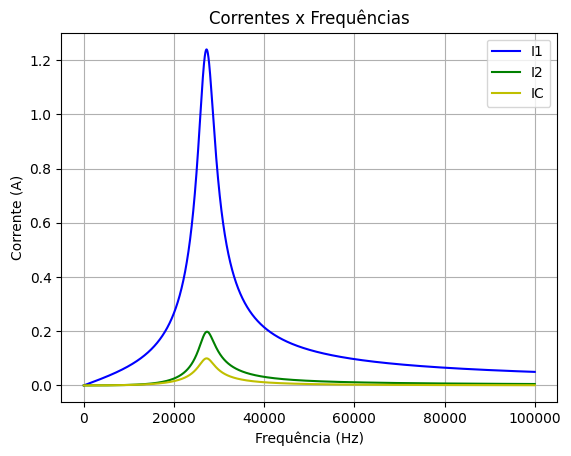

In [7]:
lista_frequencias = np.arange(10,100000,10)
params = [[],[],[],[]]
for f in lista_frequencias:
    w = 2*np.pi*f
    I1,I2,IC,V2 = calcula_parametros(w,0.1)
    params[0].append(abs(I1))
    params[1].append(abs(I2))
    params[2].append(abs(IC))
    params[3].append(abs(V2))

I1max, I2max, ICMAX= max(params[0]), max(params[1]), max(params[2])
indexI1, indexI2 , indexIC= params[0].index(I1max), params[1].index(I2max),params[2].index(ICMAX)
#Descobre a respectiva frequência para corrente máxima
fmax1,fmax2, fmaxc= lista_frequencias[indexI1],lista_frequencias[indexI2],lista_frequencias[indexIC]
print(lista_frequencias[indexIC])
plt.plot(lista_frequencias,np.abs(params[0]),'b',label = ("I1"))
plt.plot(lista_frequencias,np.abs(params[1]),'g',label = ("I2"))
plt.plot(lista_frequencias,np.abs(params[2]),'y',label = ("IC"))
plt.legend()
plt.title('Correntes x Frequências')
plt.ylabel("Corrente (A)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()



In [8]:
fmax1,fmax2, fmaxc

(27220, 27330, 27230)

Como queremos a máxima tranferência de energia vamos utilizar os valores de frequencia fmax2 e fmaxc

In [9]:
print(f"A frequência ótima encontrado foi : {fmax2} Hz")

A frequência ótima encontrado foi : 27330 Hz


### Também para termos uma visualização mais direta de como a transferência de energia é máxima , vamos plotar o gráfico de frequência x potência. 

### Gráficos das Potências


In [10]:
def potencia(Veq, Ieq):
    S = (Veq/sqrt(2))*(Ieq/sqrt(2)).conjugate()
    return S
#Função que calcula potência em função de I do resistor e R
def potencia_resistor(Ir,R):
    S =R*(Ir/sqrt(2))*(Ir/sqrt(2)).conjugate()
    return S

In [11]:
# params2 = [[],[],[],[]]
potencia_entrada = []
potencia_saida = []
rendimento = []
tensao = []
for f in lista_frequencias:
    w = 2*np.pi*f
    I1,I2,IC,V2 = calcula_parametros(w,0.1)
    S_entrada = potencia(I1,V1)
    S_saida = potencia(V2,IC)
    n = (S_saida.real/S_entrada.real)*100
    potencia_entrada.append(abs(S_entrada.real))
    potencia_saida.append(abs(S_saida.real))
    rendimento.append(abs(n))
    tensao.append(abs(V2))
#     params2[0].append(abs(S_entrada.real))
#     params2[1].append(abs(S_saida.real))
#     params2[2].append(abs(n))
#     params2[3].append(abs(V2))





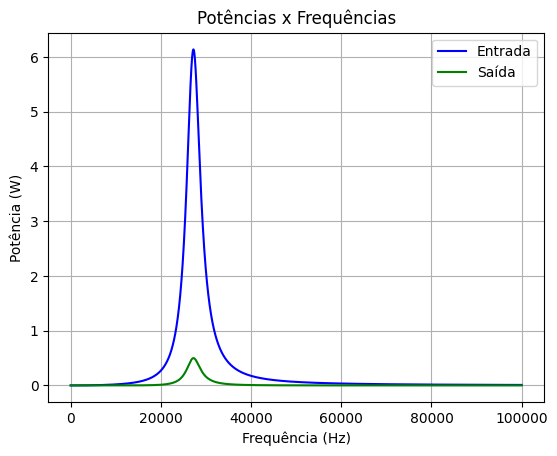

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(lista_frequencias,potencia_entrada,'b',label = ("Entrada"))
# plt.plot(lista_frequencias,params2[0],'b',label = ("Entrada"))

plt.plot(lista_frequencias,potencia_saida,'g',label = ("Saída"))
# plt.plot(lista_frequencias,params2[1],'g',label = ("Saída"))

plt.legend()
plt.title('Potências x Frequências')
plt.ylabel("Potência (W)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()

### Além da potência é muito importante olhar para a eficiência(rendimento) do circuito e é isso que vamos plotar agora

### Gráfico Eficiência x Frequência


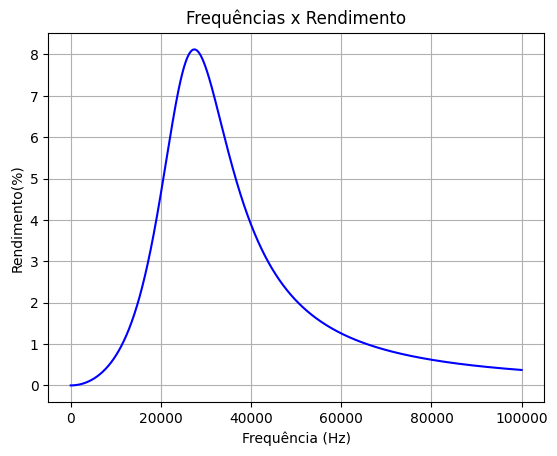

In [13]:
plt.plot(lista_frequencias,rendimento,'b')
plt.title('Frequências x Rendimento')
plt.ylabel("Rendimento(%)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()

### Gráfico Tensão na Carga x K


In [14]:
lista_k = np.arange(0,1,0.01)
lista_v = []
for k in lista_k:
    I1,I2,IC,V2 = calcula_parametros(27230*2*np.pi,k)
    lista_v.append(V2)

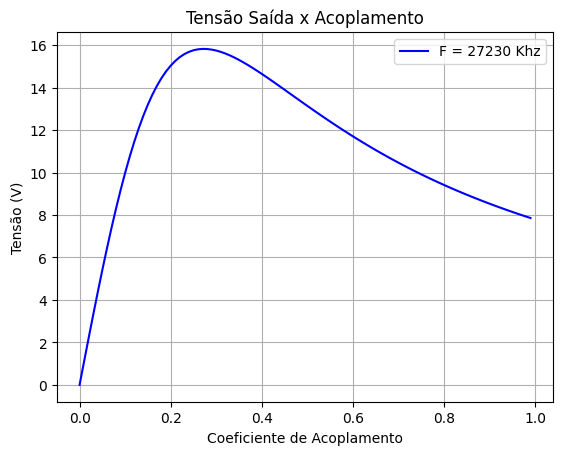

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(lista_k,np.abs(lista_v),'b',label = ("F = 27230 Khz"))
plt.title('Tensão Saída x Acoplamento')
plt.legend()
plt.ylabel("Tensão (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

## Comparação com o Real

### Dados Práticos - Dados que foram medidos no circuito montado. Para o vídeo clique <a href="https://drive.google.com/file/d/1X0IUy3awlxx0PPWuP5aoUa4R6qU_KgDJ/view">aqui</a>

Aqui listamos os pontos e vamos Plotar o gráfico da tensão de pico da carga em função da distância medida

In [16]:
lista_distancias = [2,3.4,4.4,5.4,7.5,8.1,10.2, 13.9,17.4,20.5]
lista_tensoes_p = [10.75,13.75,15,15.8,13.35,12.55,9.15,5.35,3.3,2.3]


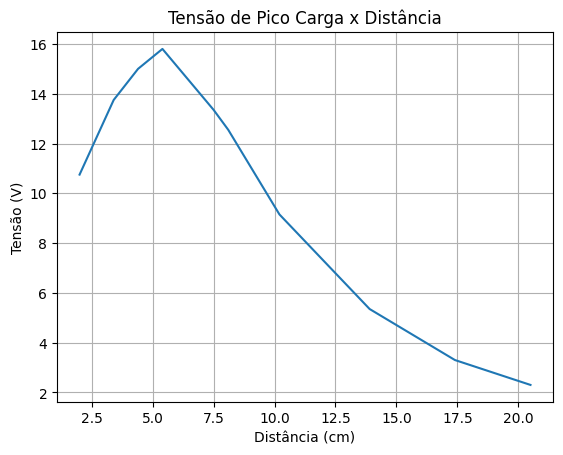

In [17]:
plt.plot(lista_distancias,lista_tensoes_p)
plt.title('Tensão de Pico Carga x Distância')
plt.ylabel("Tensão (V)")
plt.xlabel("Distância (cm)")
plt.grid(True)
plt.show()

Além das tensão também vamos olhar para a potência na carga

In [18]:
lista_potencias = []
for v in lista_tensoes_p:
    S = ((v/sqrt(2))**2)/RC 
    lista_potencias.append(S.real)

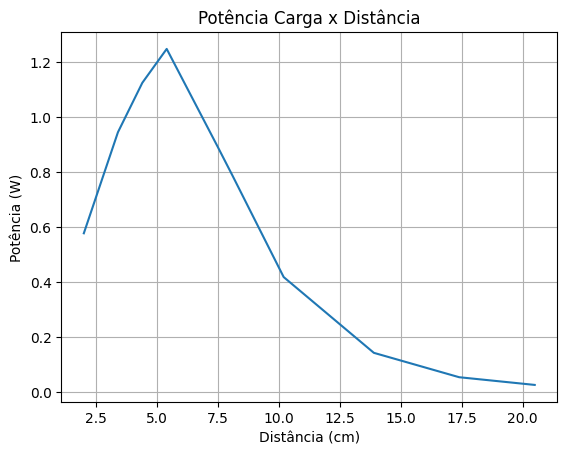

In [19]:
plt.plot(lista_distancias,lista_potencias)
plt.title('Potência Carga x Distância')
plt.ylabel("Potência (W)")
plt.xlabel("Distância (cm)")
plt.grid(True)
plt.show()

A seguir vamos achar os pontos para que consigamos comparar o modelo com o nossos dados reais

### Gráficos Comparativos

In [20]:
lista_k = np.arange(0,1,0.01)
lista_saida =  []
lista_potencias = []
for k in lista_k:
    I1,I2,IC,V2 = calcula_parametros(27240*2*np.pi,k)
    lista_saida.append(abs(V2))
    S_saida = potencia(V2,IC)
    lista_potencias.append(S_saida.real)

In [21]:
lista_k_reais = [lista_k[2],lista_k[3],lista_k[5],lista_k[9],lista_k[14],lista_k[15],lista_k[28],lista_k[37],lista_k[46],lista_k[67]]
lista_picos_reais_invertida = lista_tensoes_p[::-1]
print(max(lista_saida))

15.825766653147326


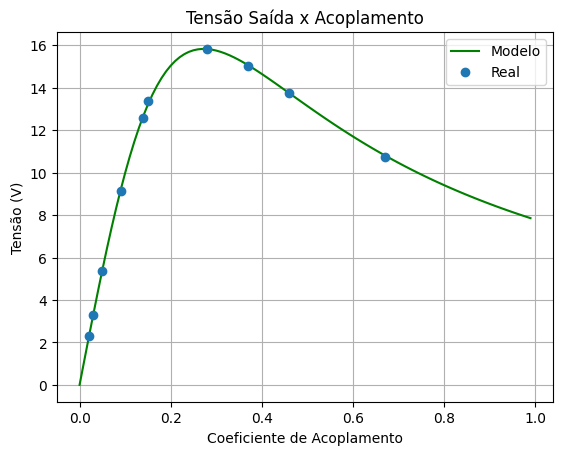

In [22]:
plt.plot(lista_k,np.abs(lista_saida),'g',label = ("Modelo"))
plt.plot(lista_k_reais,lista_picos_reais_invertida,'o',label = ("Real"))
plt.title('Tensão Saída x Acoplamento')
plt.legend()
plt.ylabel("Tensão (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

In [23]:
pot_reais = []
for i in lista_picos_reais_invertida:
    pot_reais.append(((i**2/2)/RC).real)

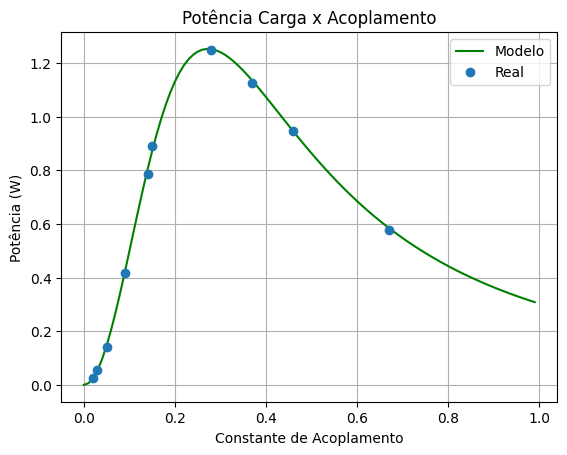

In [24]:
plt.plot(lista_k,lista_potencias,'g',label = ("Modelo"))
plt.plot(lista_k_reais,pot_reais,'o',label = ("Real"))
plt.legend()
plt.title('Potência Carga x Acoplamento')
plt.ylabel("Potência (W)")
plt.xlabel("Constante de Acoplamento")
plt.grid(True)
plt.show()

## Aqui Vamos fazer alguns gráficos conclusivos, para analisar o comportamento de alguns valores

### O primeiro gráfico que faremos é o gráfico da Frequência em função do fator de acoplamento

In [25]:
lista_frequencias = np.arange(10,100000,10)
lista_k = np.arange(0.1,1,0.05)
frequencia_otima = []
corrente_lista = []
for k in lista_k:
    corrente_lista = []
    for f in lista_frequencias:
        I1,I2,IC,V2 = calcula_parametros(f*2*np.pi,k)
        corrente_lista.append(abs(I2))
#     print(abs(I2), k)
#     print(k)
    idx_max = corrente_lista.index(max(corrente_lista))
    frequencia_otima.append(lista_frequencias[idx_max])
print(frequencia_otima)


[27330, 27490, 27760, 28160, 28790, 29830, 31450, 33470, 35720, 38190, 40970, 44220, 48140, 53100, 59720, 69320, 85290, 99990]


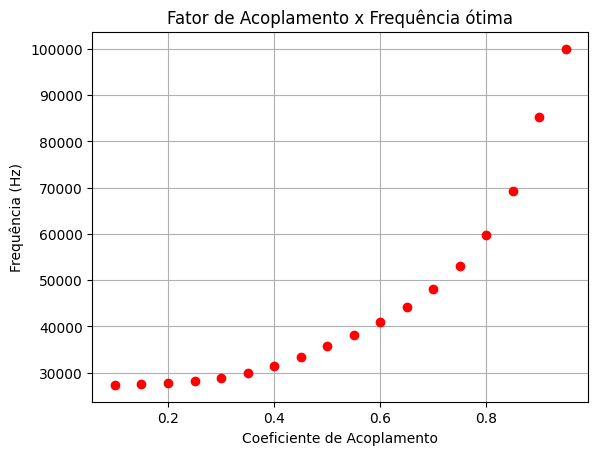

In [26]:
plt.plot(lista_k,frequencia_otima,'ro',)
plt.title('Fator de Acoplamento x Frequência ótima')
plt.ylabel("Frequência (Hz)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

#### Com o gráfico acima, podemos perceber que quanto maior for o fator de acoplamento maior será a frequência ótima

### O segundo gráfico será da Tensão de Saída x Acomplamento em em função de R1 e R2


In [48]:
lista_resistencia = np.arange(10,40,5)

In [49]:
def calcula_parametros(w,k,R):
    """
    Aqui temos uma função que recebe a frequência angular e o fator de acoplamento (k)
    e devolve as correntes I1, I2, IC e V2
    """
    M = k*np.sqrt(L_1*L_2)
    XL1 = 0 + w*L_1*1j
    XL2 = 0 + w*L_2*1j
    XC1 = 0 - (1/(w*C_1))*1j
    XC2 = 0 - (1/(w*C_2))*1j
    Z_eq = ( RC* XC2) / ( RC+ XC2)
    XM = 0 + (w*M)*1j
    Z1 = R + XL1 + XC1
    Z2 = XL2 + R + Z_eq
    Z = np.array([
        [Z1, -XM],
        [-XM,  Z2]
    ])
    V = np.array([V1, 0])
    I1,I2 = np.dot(linalg.inv(Z), V)
    V2 = Z_eq * I2
    IC = V2 / RC
    return I1, I2, IC, V2

In [50]:
lista_k = np.arange(0,1,0.01)
lista_saidas = []
for r in lista_resistencia:
    lista_v = []
    for k in lista_k:
        I1,I2,IC,V2 = calcula_parametros(27240*2*np.pi,k,r)
        lista_v.append(V2)
    lista_saidas.append(lista_v)

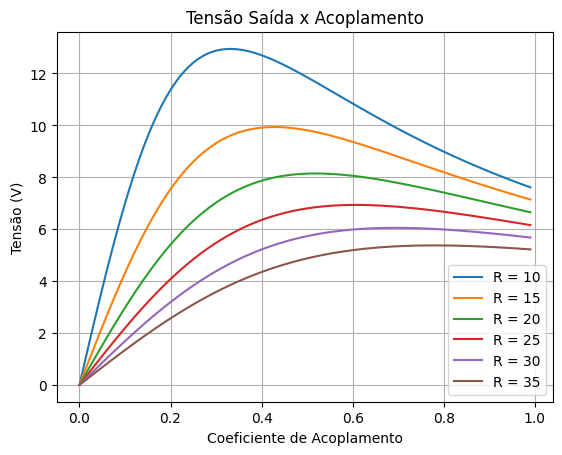

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(0,len(lista_resistencia)):
    plt.plot(lista_k,np.abs(lista_saidas[i]),label = (f"R = {lista_resistencia[i]}"))
plt.title('Tensão Saída x Acoplamento')
plt.legend()
plt.ylabel("Tensão (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

#### Com o gráfico acima conseguimos perceber que quanto maior é a resistência menor é a tensão de saída e mais deslocada a direita a onda estará em relação ao coeficiente de acoplamento